In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import folium as fm
from shapely.geometry import Polygon

from math import radians, asin, sqrt, sin, cos, log, log10

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from collections import Counter

from IPython.core.display import Markdown, display, HTML

In [2]:
# beautify the screen display
%matplotlib inline
pd.options.display.max_columns = 200
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
  .rendered_html tr, .rendered_html th,  .rendered_html td {   text-align: right; }  
  .rendered_html :first-child {   text-align: left; } 
  .rendered_html :last-child {   text-align: left; }
  </style>"""))

# Tweak default output of pyplots
screen_dpi = plt.rcParams['figure.dpi']
# 'figsize' is in inches, so convert desired default figure size in pixels into inches using the given sceen dpi 
plt.rcParams["figure.figsize"] = [800/screen_dpi,600/screen_dpi]

In [3]:
# 12-step qualitative color scale, courtesy of www.colorbrewer2.org
# clust_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
clust_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']

In [4]:
zones = pd.read_csv('Dataset/Processed/Zone 1-3.csv', index_col='Id')
# zones = zones['Id']
zones.head()

Zone
Id      
30     1
42     1
40     1
43     1
13     1

In [5]:
# comparison = pd.read_csv('Dataset/Processed/hourly_comparison.csv', sep=',', decimal='.', header=0, index_col='id', dtype=np.float64)
comparison = pd.read_csv('Dataset/Processed/hourly_comparison_visitor.csv', sep=',', decimal='.', header=0, index_col='id')

comparison = comparison.join(zones, how='inner').drop('Zone', axis=1)

comparison.head()

week hour=1;00: N visitors by week hours  \
1                                  0.484018   
2                                  0.785714   
3                                  0.456140   
4                                  0.787234   
5                                  0.712329   

   week hour=1;01: N visitors by week hours  \
1                                  0.497436   
2                                  0.810526   
3                                  0.306122   
4                                  0.706422   
5                                  0.714286   

   week hour=1;02: N visitors by week hours  \
1                                  0.478528   
2                                  0.687500   
3                                  0.369565   
4                                  0.666667   
5                                  0.690476   

   week hour=1;03: N visitors by week hours  \
1                                  0.382353   
2                                  0.545455   
3                                  0.289474   
4                                  0.648148   
5                                  0.725000   

   week hour=1;04: N visitors by week hours  \
1                                  0.386364   
2                                  0.560000   
3                                  0.250000   
4                                  0.565217   
5                                  0.696970   

   week hour=1;05: N visitors by week hours  \
1                                  0.344828   
2                                  0.600000   
3                                  0.219512   
4                                  0.673913   
5                                  0.714286   

   week hour=1;06: N visitors by week hours  \
1                                  0.330357   
2                                  0.500000   
3                                  0.216216   
4                                  0.641026   
5                                  0.647059   

   week hour=1;07: N visitors by week hours  \
1                                  0.314050   
2                                  0.461538   
3                                  0.302326   
4                                  0.586957   
5                                  0.622642   

   week hour=1;08: N visitors by week hours  \
1                                  0.389706   
2                                  0.617021   
3                                  0.173913   
4                                  0.593750   
5                                  0.573770   

   week hour=1;09: N visitors by week hours  \
1                                  0.382514   
2                                  0.542373   
3                                  0.352113   
4                                  0.472222   
5                                  0.563636   

   week hour=1;10: N visitors by week hours  \
1                                  0.409756   
2                                  0.589744   
3                                  0.365591   
4                                  0.656566   
5                                  0.548872   

   week hour=1;11: N visitors by week hours  \
1                                  0.426471   
2                                  0.660000   
3                                  0.329412   
4                                  0.731034   
5                                  0.551724   

   week hour=1;12: N visitors by week hours  \
1                                  0.441509   
2                                  0.660714   
3                                  0.447619   
4                                  0.706468   
5                                  0.622340   

   week hour=1;13: N visitors by week hours  \
1                                  0.486804   
2                                  0.676056   
3                                  0.433333   
4                                  0.738532   
5                                  0.598456   

   week hour=1;14: N visitors by week hou

In [6]:
division_geo = gpd.read_file('Dataset/Processed/London_division.shp', driver="ESRI Shapefile")
division_geo.head()

id               name      area  \
0   1   Trafalgar Square  0.277425   
1   2            Big Ben  0.399994   
2   3  Parliament Square  0.236767   
3   4         London Eye  0.425408   
4   5        Tate Modern  0.686323   

                                            geometry  
0  POLYGON ((-0.1304619 51.50952, -0.12742117 51....  
1  POLYGON ((-0.12498988 51.503284, -0.12284501 5...  
2  POLYGON ((-0.12562872 51.502274, -0.124708146 ...  
3  POLYGON ((-0.12235283 51.503895, -0.119325526 ...  
4  POLYGON ((-0.0996684 51.51117, -0.095774494 51...

In [7]:
interval_median_comparison = comparison.median(skipna=True)

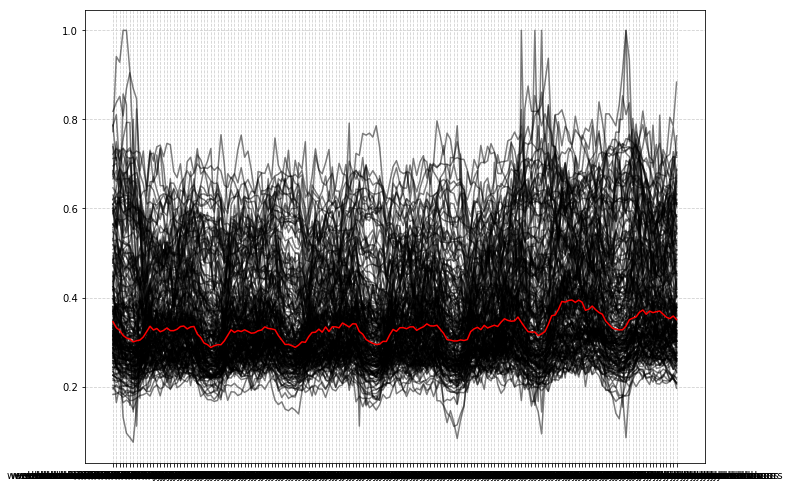

In [8]:
fig, ax = plt.subplots()

for index, row in comparison.iterrows():
    ax.plot(comparison.columns, row, color='#00000080', label=row.name)

ax.plot(comparison.columns, interval_median_comparison, color='red')

ax.yaxis.grid(color='#D0D0D0', linestyle='--')

ax.set_xticks(comparison.columns)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
    
ax.xaxis.grid(color='#D0D0D0', linestyle='--')

plt.show()

In [9]:
mod_steps = 167

def uncluterred_plot(time_series):
    interval_min = time_series.min(skipna=True)
    interval_max = time_series.max(skipna=True)
    interval_mean = time_series.mean(skipna=True)
    interval_median = time_series.median(skipna=True)

    quantile_borders = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    int_quantiles = time_series.quantile(quantile_borders).T

    quant_color_dark  = '#B0B0B0FF'
    quant_color_light = '#F0F0F0FF'
    quant_range_colors = [quant_color_light, quant_color_dark]

    fig, axs = plt.subplots(1, 2, figsize=(1200/screen_dpi,400/screen_dpi))

    ###### First (left) subplot
    ax = axs[0]
    for i in range(1, len(quantile_borders)):
        ax.fill_between(int_quantiles.index, int_quantiles[quantile_borders[i-1]], int_quantiles[quantile_borders[i]], facecolor=quant_range_colors[i%2])

    ax.plot(interval_min.index, interval_min, color=quant_color_dark)
    ax.plot(interval_max.index, interval_max, color=quant_color_dark)

    legend_handles = [None, None] # Manually collect relevant legend handles, so we can suppress that every single (auto-labeled) decentile element gets crammed into the legend
    legend_handles[0], = ax.plot(interval_mean.index, interval_mean, color='blue')
    legend_handles[1], = ax.plot(interval_median.index, interval_median, color='red')

    # Draw a subtle reference grid
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')

    # X-axis tick labels might need a little bit of help to look nicely
    ax.set_xticks(int_quantiles.index)
    #for i, tick in enumerate(ax.get_xticklabels()):
    #    tick.set_label(str(int_quantiles.index))
    #    tick.set_rotation(45)

    ax.set_title('Per-cell time series')

    ax.set_xlim(0, mod_steps)
    ax.set_ylim(0)

    ###### Second (right) subplot
    ax = axs[1]
    for i in range(1, len(quantile_borders)):
        ax.fill_between(int_quantiles.index, int_quantiles[quantile_borders[i-1]], int_quantiles[quantile_borders[i]], facecolor=quant_range_colors[i%2])

    ax.plot(interval_min.index, interval_min, color=quant_color_dark)
    ax.plot(interval_max.index, interval_max, color=quant_color_dark)

    legend_handles = [None, None] # Manually collect relevant legend handles, so we can suppress that every single (auto-labeled) decentile element gets crammed into the legend
    legend_handles[0], = ax.plot(interval_mean.index, interval_mean, color='blue')
    legend_handles[1], = ax.plot(interval_median.index, interval_median, color='red')

    # Draw a subtle reference grid
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')

    # X-axis tick labels might need a little bit of help to look nicely
    ax.set_xticks(int_quantiles.index)
    #for i, tick in enumerate(ax.get_xticklabels()):
    #    tick.set_label(str(int_quantiles.index))
    #    tick.set_rotation(45)

    ax.set_title('Low-value range details')

    ax.set_xlim(0, mod_steps)
    # Zoom the plot on the low values range for more details
    ax.set_ylim(0, 100)

    ###### Joint legend
    labels = ['Mean', 'Median']
    ax.legend(handles=legend_handles, title='Reference Time Series', labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()

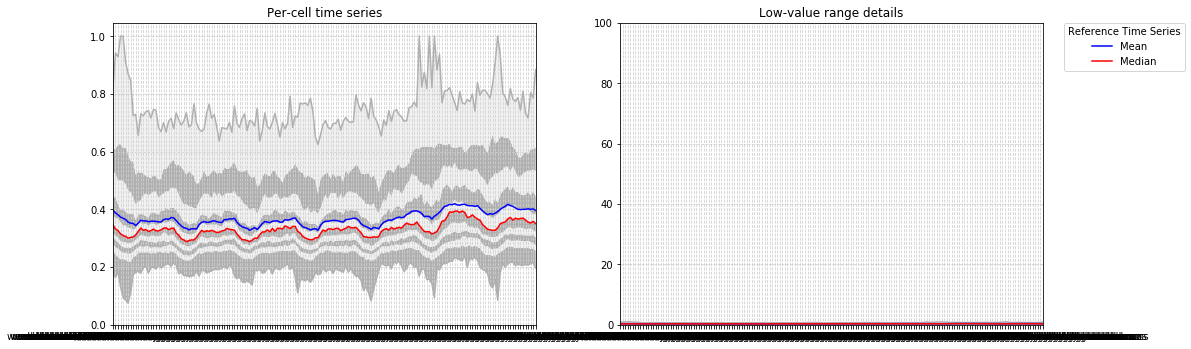

In [10]:
uncluterred_plot(comparison)

In [11]:
k = 5 # 12 is tthe upper limit for k, as ColorBrewer's color scale has 12 colors only.

clust_id_col_name = 'Cluster ID (k={})'.format(k)
# clust_id_col_name = 'Cluster ID'

# time_series.head()

In [12]:
def clusterize(series):    
    kmeans = KMeans(n_clusters=k, random_state=42)
    clus = kmeans.fit(series)
#     clus = kmeans.fit(series.drop([clust_id_col_name], axis=1))
    clustered_series = series.copy()
    clustered_series[clust_id_col_name] = clus.labels_
    
#     centroids = pd.DataFrame(data=clus.cluster_centers_, columns=series.drop([clust_id_col_name], axis=1).columns)
#     print(series.drop([clust_id_col_name], axis=1).columns)
    centroids = pd.DataFrame(data=clus.cluster_centers_, columns=series.columns)
    cluster_sizes = Counter(clus.labels_)
    for cid, cnt in cluster_sizes.items():
        cluster_sizes[cid] = (cnt, log10(cnt) + 1)

    return (clustered_series, centroids, cluster_sizes)

In [20]:
# comparison = comparison.drop([clust_id_col_name], axis=1)
(comparison_clustered, comparison_centroids, comparison_cluster_sizes) = clusterize(comparison)
comparison_clustered.to_csv('Dataset/clustered_comparison_visitor.csv', index_label='id')
comparison_clustered.head()

week hour=1;00: N visitors by week hours  \
1                                  0.484018   
2                                  0.785714   
3                                  0.456140   
4                                  0.787234   
5                                  0.712329   

   week hour=1;01: N visitors by week hours  \
1                                  0.497436   
2                                  0.810526   
3                                  0.306122   
4                                  0.706422   
5                                  0.714286   

   week hour=1;02: N visitors by week hours  \
1                                  0.478528   
2                                  0.687500   
3                                  0.369565   
4                                  0.666667   
5                                  0.690476   

   week hour=1;03: N visitors by week hours  \
1                                  0.382353   
2                                  0.545455   
3                                  0.289474   
4                                  0.648148   
5                                  0.725000   

   week hour=1;04: N visitors by week hours  \
1                                  0.386364   
2                                  0.560000   
3                                  0.250000   
4                                  0.565217   
5                                  0.696970   

   week hour=1;05: N visitors by week hours  \
1                                  0.344828   
2                                  0.600000   
3                                  0.219512   
4                                  0.673913   
5                                  0.714286   

   week hour=1;06: N visitors by week hours  \
1                                  0.330357   
2                                  0.500000   
3                                  0.216216   
4                                  0.641026   
5                                  0.647059   

   week hour=1;07: N visitors by week hours  \
1                                  0.314050   
2                                  0.461538   
3                                  0.302326   
4                                  0.586957   
5                                  0.622642   

   week hour=1;08: N visitors by week hours  \
1                                  0.389706   
2                                  0.617021   
3                                  0.173913   
4                                  0.593750   
5                                  0.573770   

   week hour=1;09: N visitors by week hours  \
1                                  0.382514   
2                                  0.542373   
3                                  0.352113   
4                                  0.472222   
5                                  0.563636   

   week hour=1;10: N visitors by week hours  \
1                                  0.409756   
2                                  0.589744   
3                                  0.365591   
4                                  0.656566   
5                                  0.548872   

   week hour=1;11: N visitors by week hours  \
1                                  0.426471   
2                                  0.660000   
3                                  0.329412   
4                                  0.731034   
5                                  0.551724   

   week hour=1;12: N visitors by week hours  \
1                                  0.441509   
2                                  0.660714   
3                                  0.447619   
4                                  0.706468   
5                                  0.622340   

   week hour=1;13: N visitors by week hours  \
1                                  0.486804   
2                                  0.676056   
3                                  0.433333   
4                                  0.738532   
5                                  0.598456   

   week hour=1;14: N visitors by week hou

In [21]:
def plot_clusters(time_series, centroids, cluster_sizes, selected_clusters=None):
    fig, ax = plt.subplots()
    fig.set_size_inches(1200/screen_dpi, 900/screen_dpi)

    # Select subset of clusters for detail comparison
    #selected_clusters = [0, 3, 5]
    # or use the next statement to display all clusters simultaneously
    if (selected_clusters is None):
        selected_clusters = [x for x in range(k)]

    x_vals = [x for x in range(mod_steps+1)]
    for index, row in time_series.iterrows():
        cluster_id = row[mod_steps+1]
        if (cluster_id < k and cluster_id in selected_clusters):
#             ax.plot(x_vals, row[0:mod_steps+1], color=clust_colors[int(cluster_id)], alpha= 0.1, label=index)
            ax.plot(x_vals, row[0:mod_steps+1], color=clust_colors[int(cluster_id)], alpha= 0.2, label=index)

    legend_handles = [] # Manually collect relevant legend handles, so we can suppress that every single cell's label gets crammed into the legend
    for cluster_id, centroid in centroids.iterrows():
        if (cluster_id in selected_clusters):
            centroid_handle, = ax.plot(centroid.index, centroid, color=clust_colors[int(cluster_id)], alpha= 1.0, linewidth=2, label=cluster_id)
            legend_handles.append(centroid_handle)

#     ax.set_ylabel(target_col)
    ax.set_ylabel('Count')
    ax.yaxis.grid(color='#D0D0D0', linestyle='--')
    ax.xaxis.grid(color='#D0D0D0', linestyle='--')
    ax.set_xticks(x_vals[::12])

#     ax.set_ylim(0, max_val)

    plt.title('Temporal Cluster Variance')

    labels = [None] * len(selected_clusters)
    for i, cid in enumerate(selected_clusters):
        labels[i] = '{:>2} ({:>4})'.format(cid, cluster_sizes[cid][0])

    plt.legend(handles=legend_handles, title='Cluster ID (Cluster size)', labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()

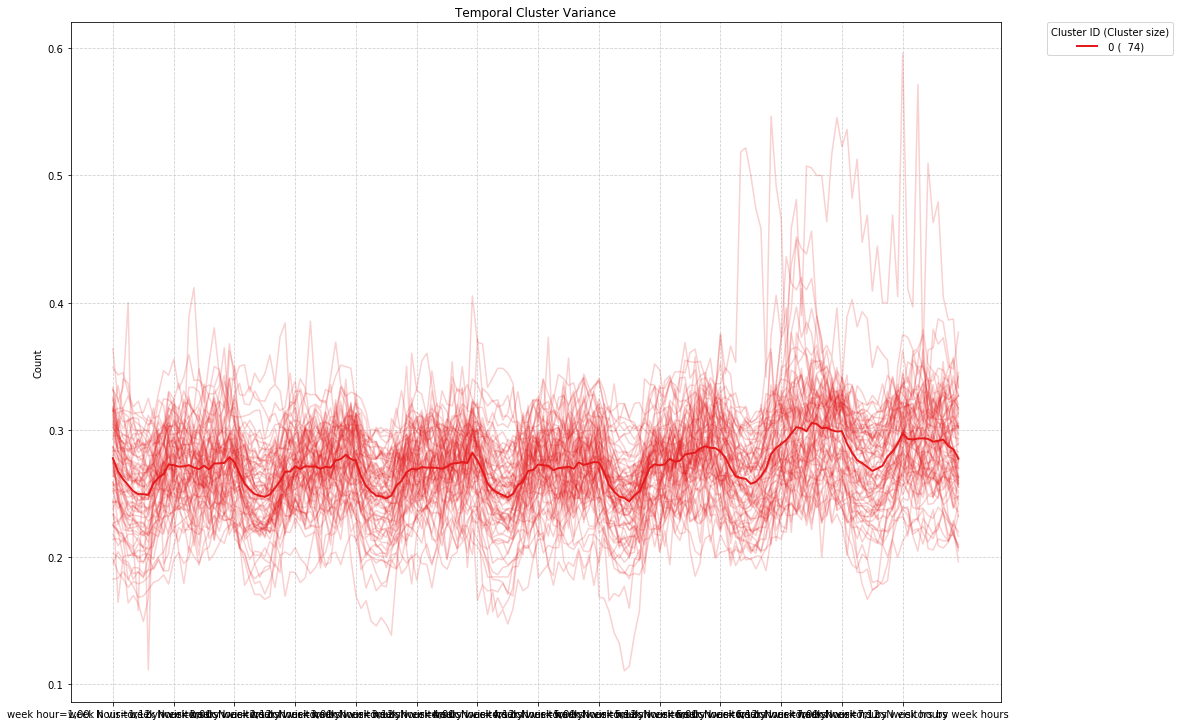

In [22]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [0])

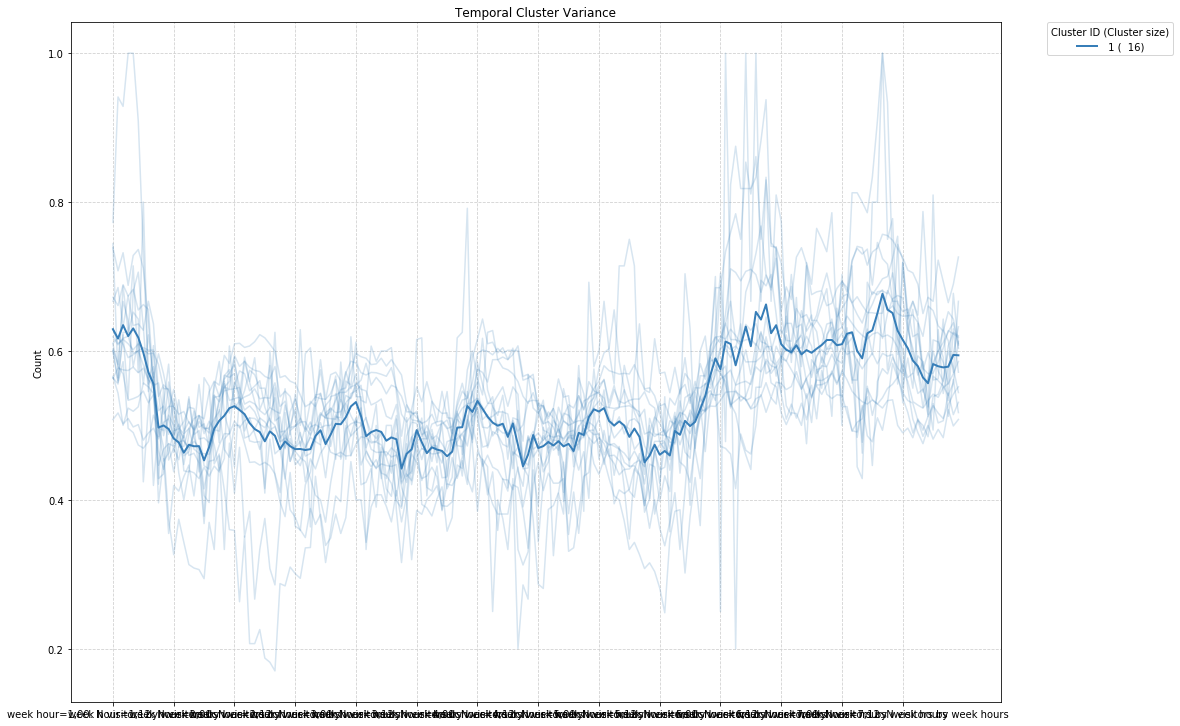

In [23]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [1])

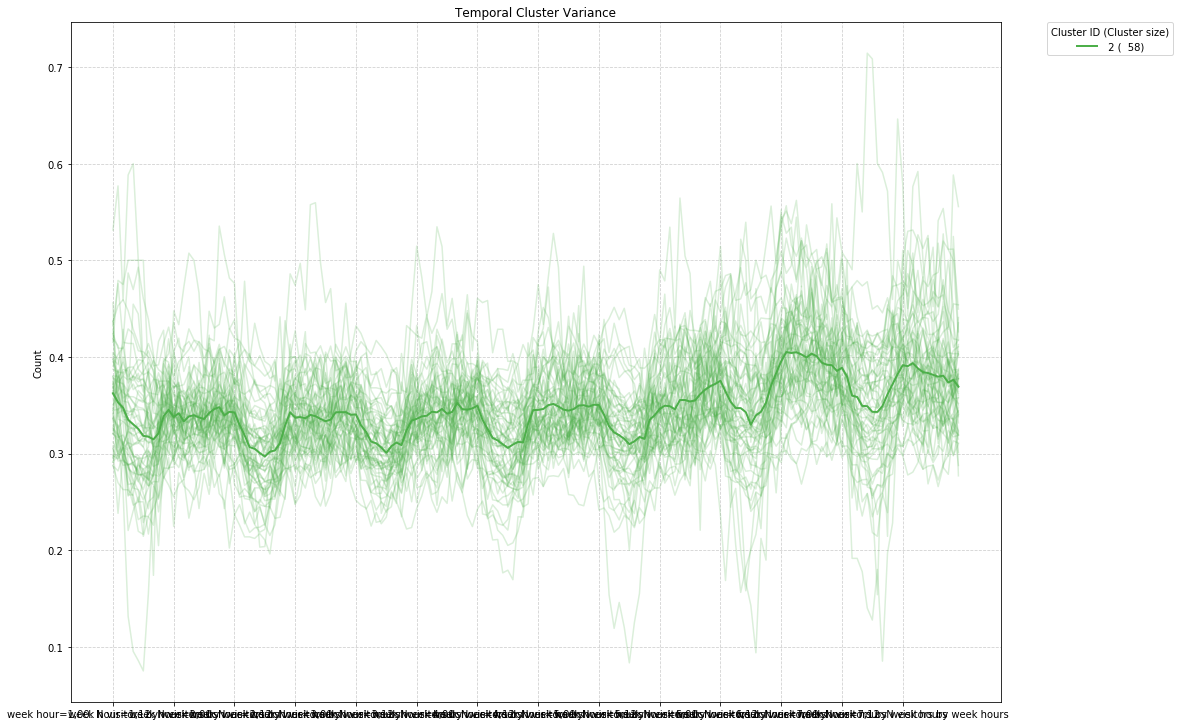

In [24]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [2])

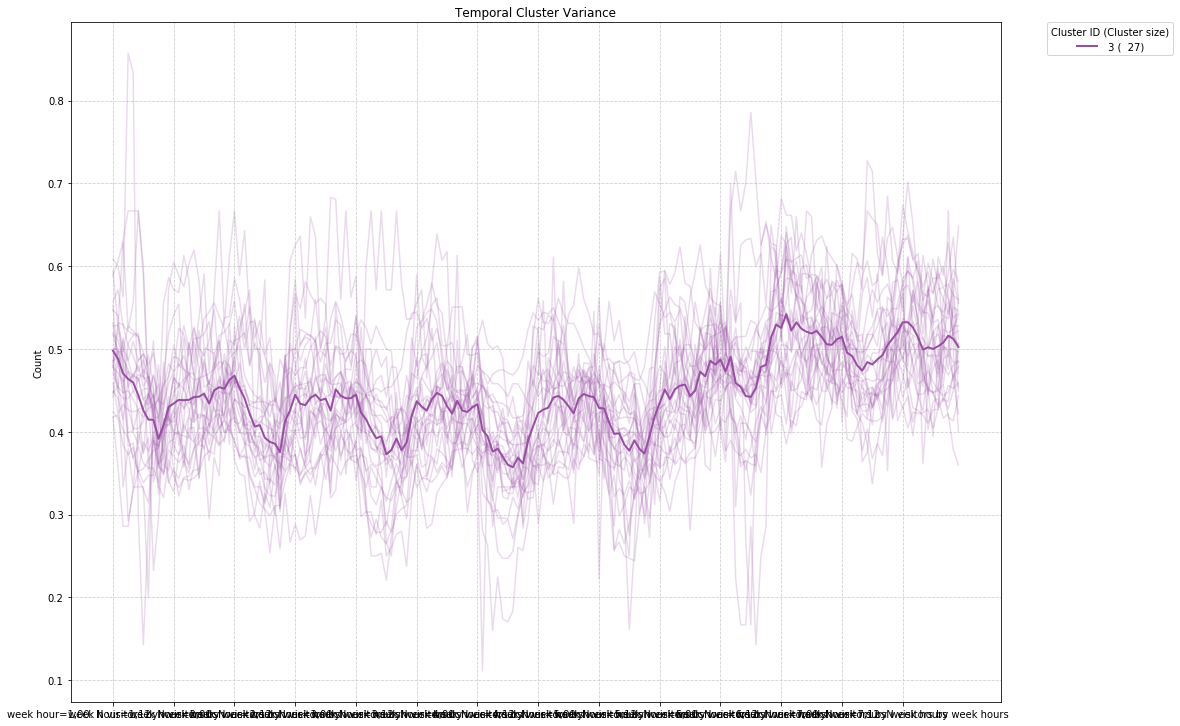

In [25]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [3])

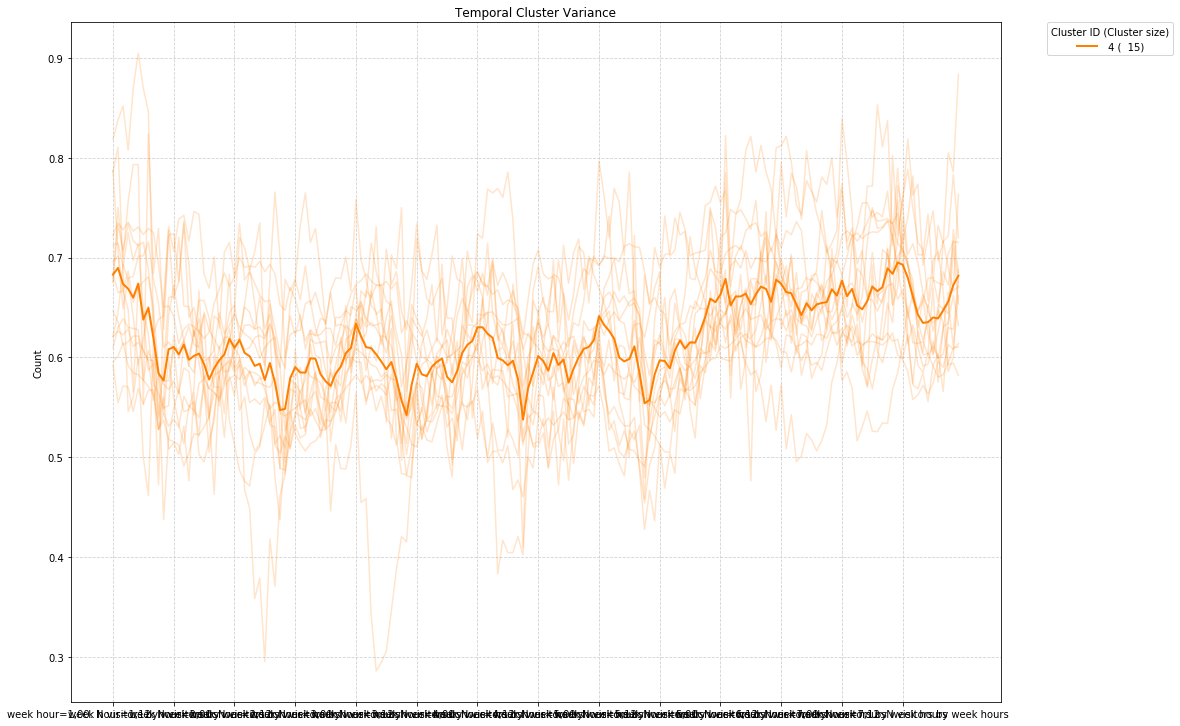

In [26]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes, [4])

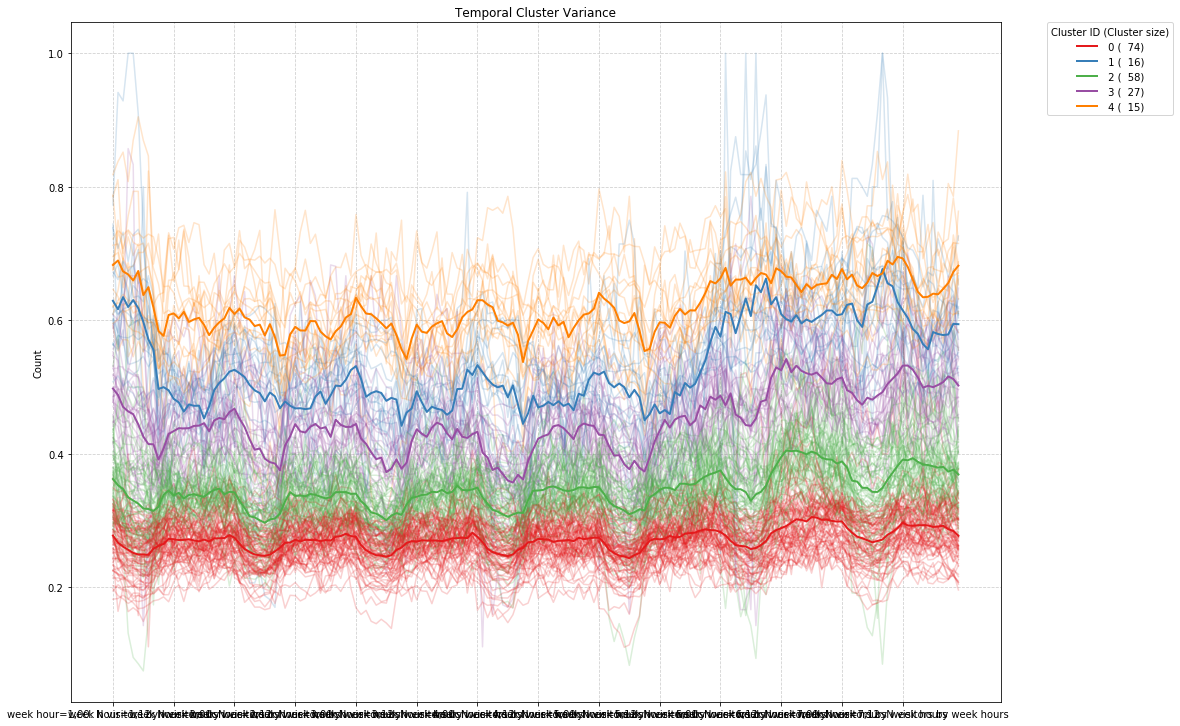

In [27]:
plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes)

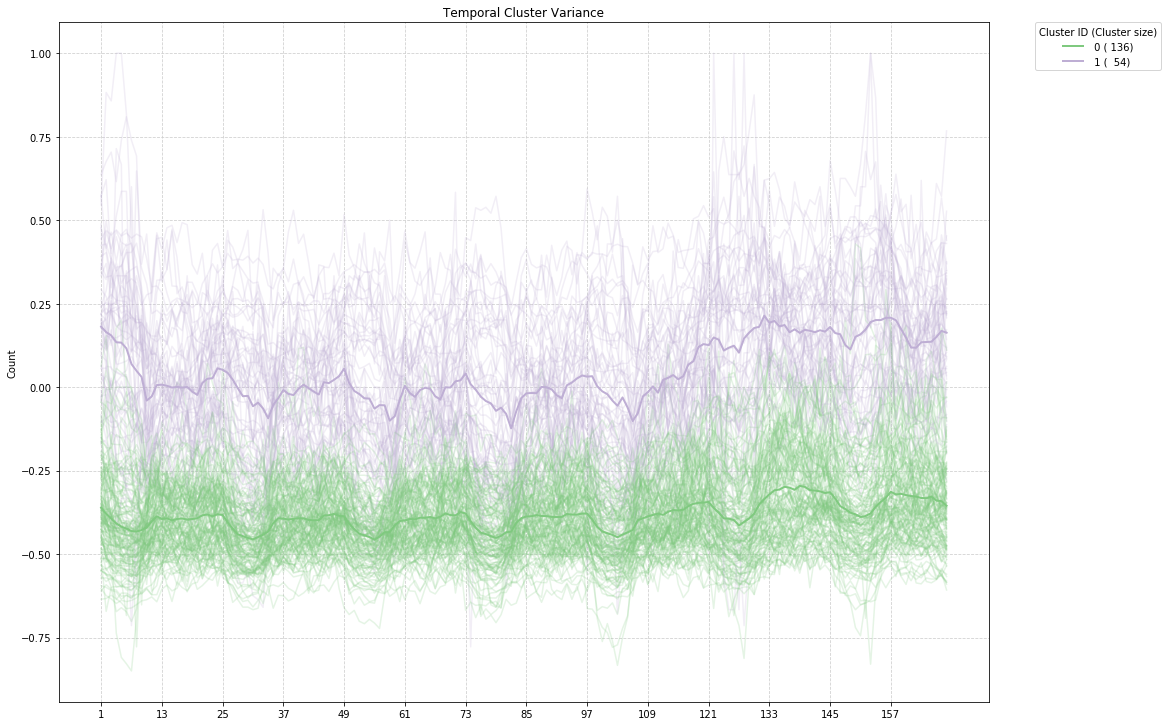

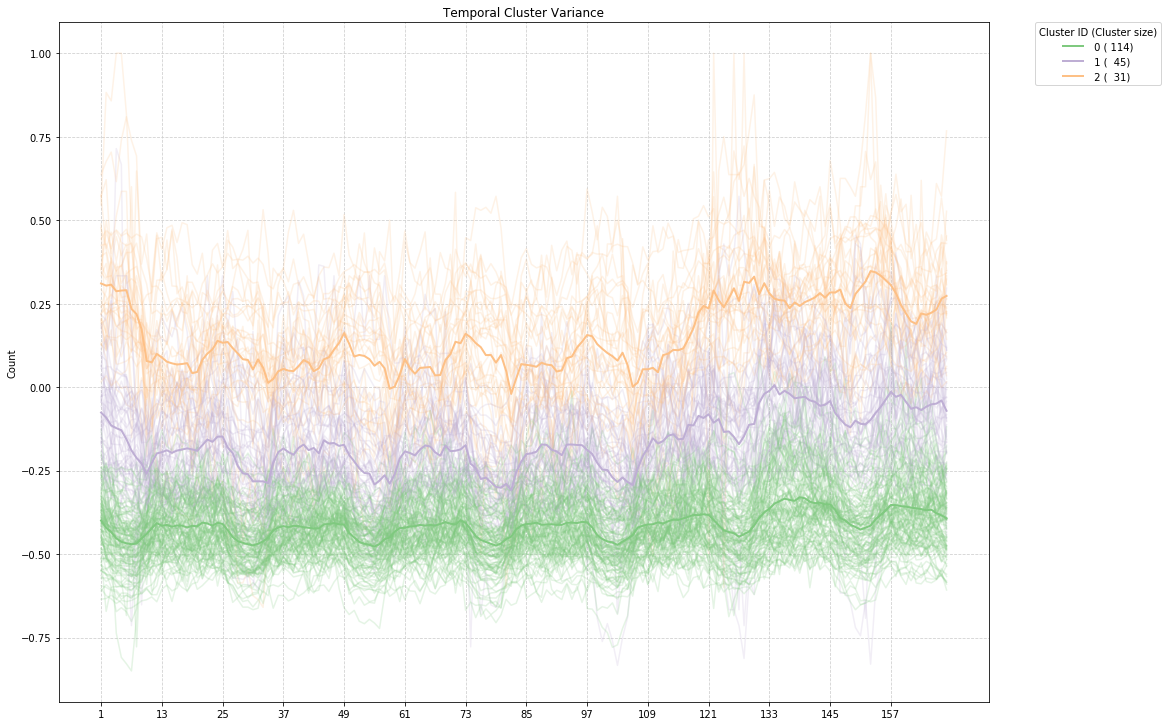

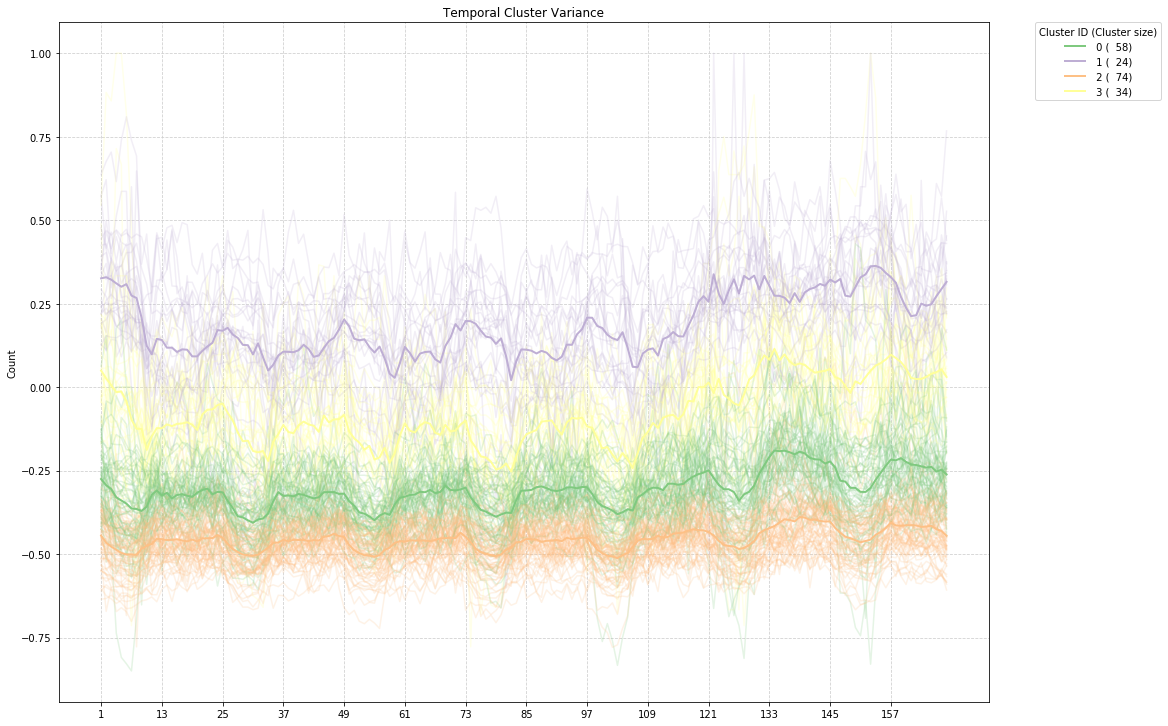

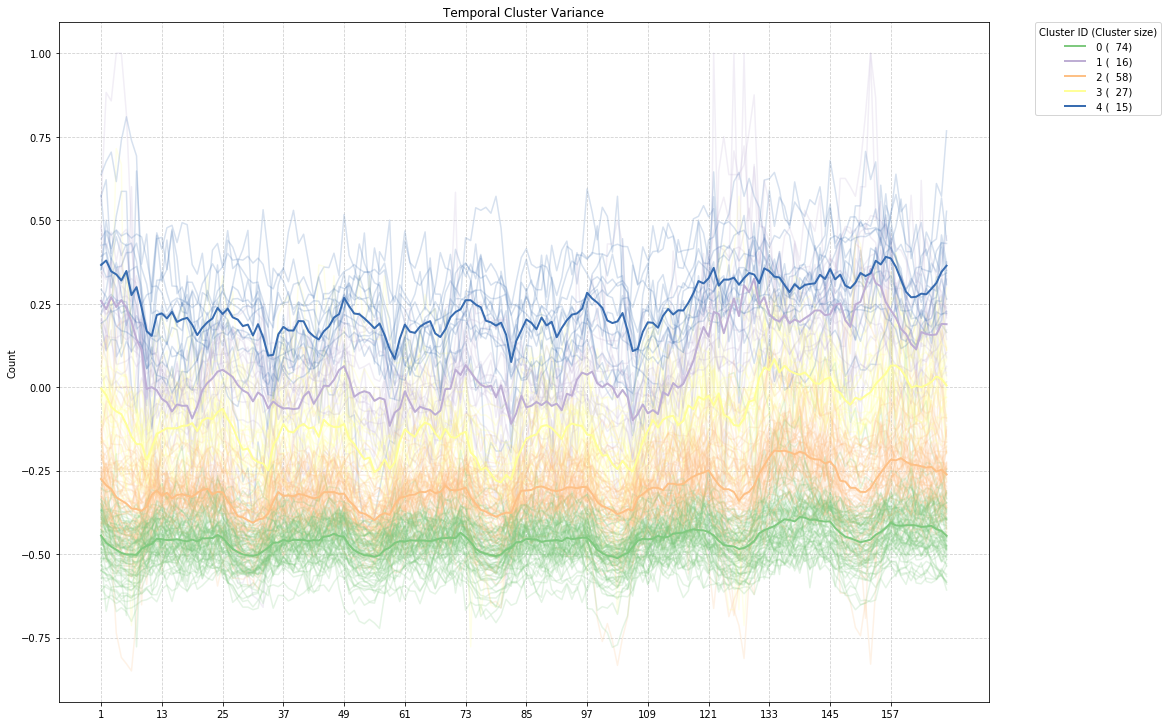

IndexError: list index out of range

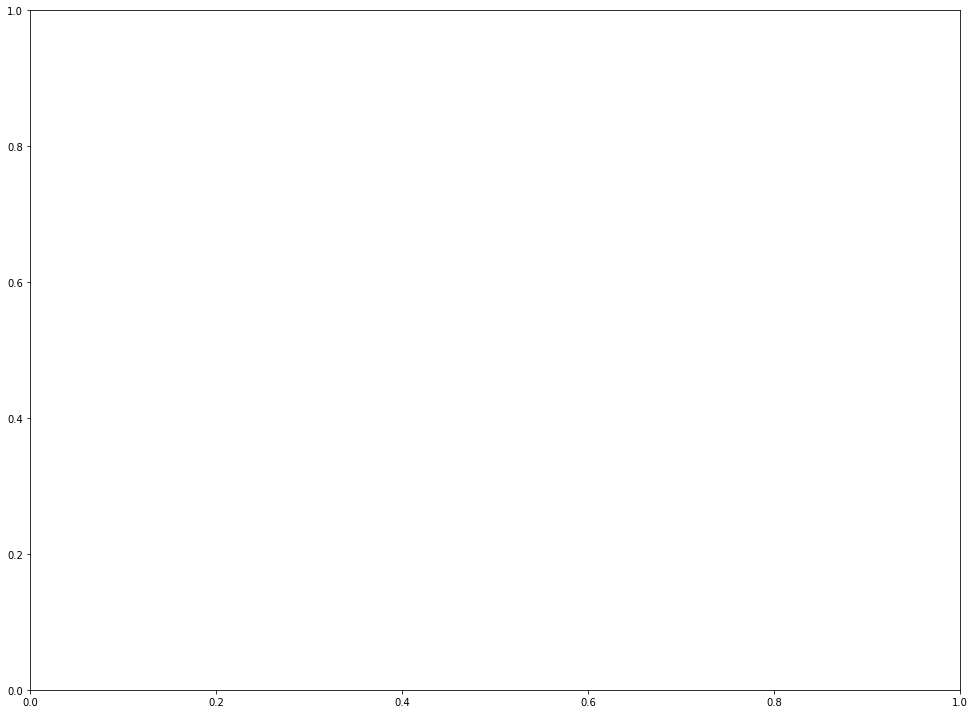

In [258]:
# for k in range(2,13):
# #     print(k)
# #     clust_id_col_name = 'Cluster ID (k={})'.format(k)
#     comparison = comparison.drop([clust_id_col_name], axis=1)
#     (comparison_clustered, comparison_centroids, comparison_cluster_sizes) = clusterize(comparison)
#     plot_clusters(comparison_clustered, comparison_centroids, comparison_cluster_sizes)
    